<a href="https://colab.research.google.com/github/Chapa0000/DS2/blob/main/PreE_DSII_JRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


spreadsheet_id = '1ZeLJ_O2UqZzhMdnxJpMttfEJePlNTFKh'

url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=xlsx'

url = pd.read_excel(url, engine='openpyxl')

In [3]:
url.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [4]:
# Eliminar las 3 primeras filas

url = url.iloc[3:]

In [5]:
url.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [6]:
# Asignar la primera fila como indice

url = url.rename(columns=url.iloc[0]).drop(url.index[0])
url.head()


,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,NaN,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [7]:
# Eliminar la primer columna

url = url.drop(url.columns[0], axis=1)



In [8]:
url.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [9]:
# Revisar tipos de datos y valores nulos

url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 4 to 9651
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [10]:
url.describe().T

<ipython-input-10-b5846e29d9f3>:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  url.describe().T


,count,unique,top,freq
Retailer,9648,6,Foot Locker,2637
Retailer ID,9648,4,1185732,5265
Invoice Date,9648,724,2021-01-17 00:00:00,77
Region,9648,5,West,2448
State,9648,50,California,432
City,9648,52,Portland,360
Product,9648,6,Men's Street Footwear,1610
Price per Unit,9648,146,50,557
Units Sold,9648,361,225,207
Total Sales,9648,3512,100000,52


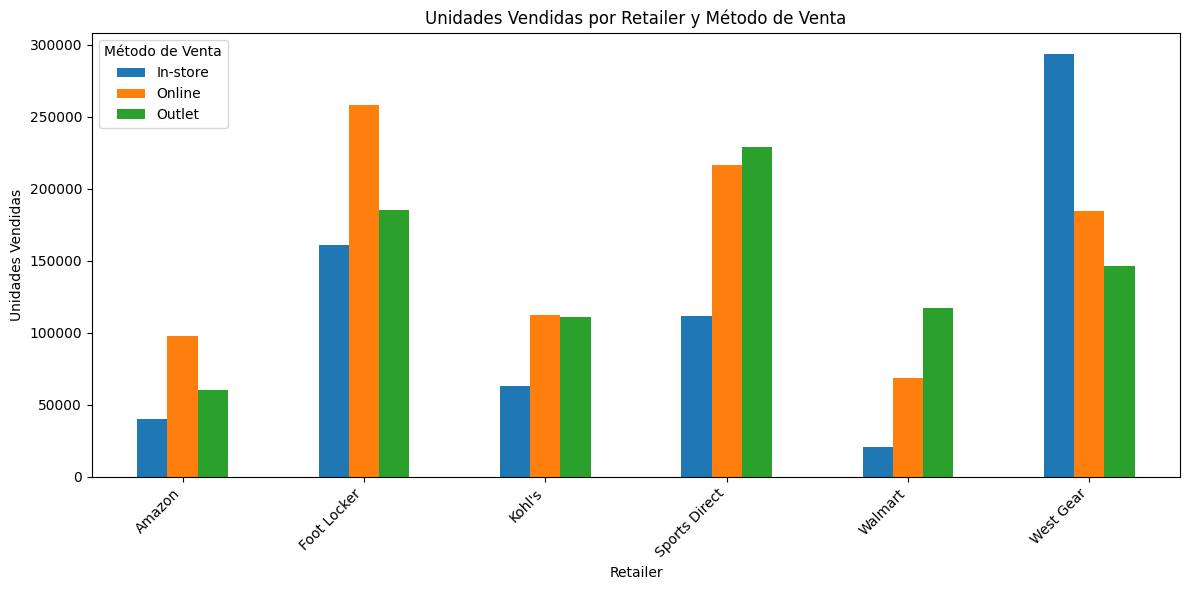

In [14]:
# Visualizaciones

# Agrupar por Retailer y Método de Venta y sumar las unidades vendidas
unidades_por_retailer_metodo = url.groupby(['Retailer', 'Sales Method'])['Units Sold'].sum().unstack()

# Crear el gráfico
unidades_por_retailer_metodo.plot(kind='bar', figsize=(12, 6))
plt.title('Unidades Vendidas por Retailer y Método de Venta')
plt.xlabel('Retailer')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Método de Venta')
plt.tight_layout()
plt.show()


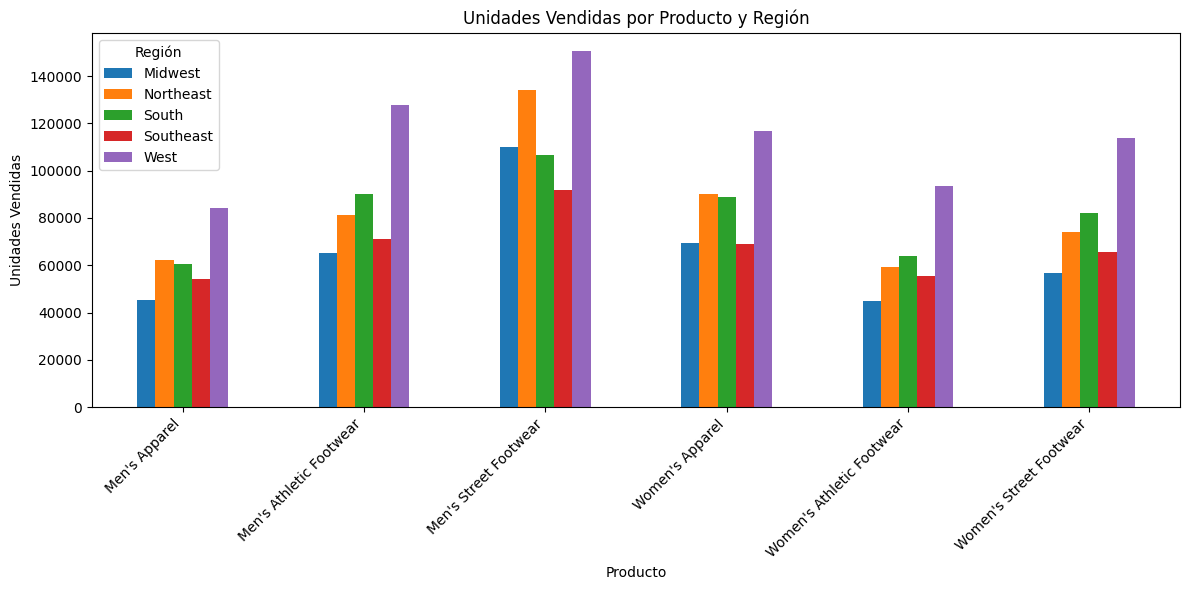

In [17]:
# prompt: hacer un grafico de product por region

# Agrupar por Product y Region y sumar las unidades vendidas
unidades_por_producto_region = url.groupby(['Product', 'Region'])['Units Sold'].sum().unstack()

# Crear el gráfico
unidades_por_producto_region.plot(kind='bar', figsize=(12, 6))
plt.title('Unidades Vendidas por Producto y Región')
plt.xlabel('Producto')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región')
plt.tight_layout()
plt.show()


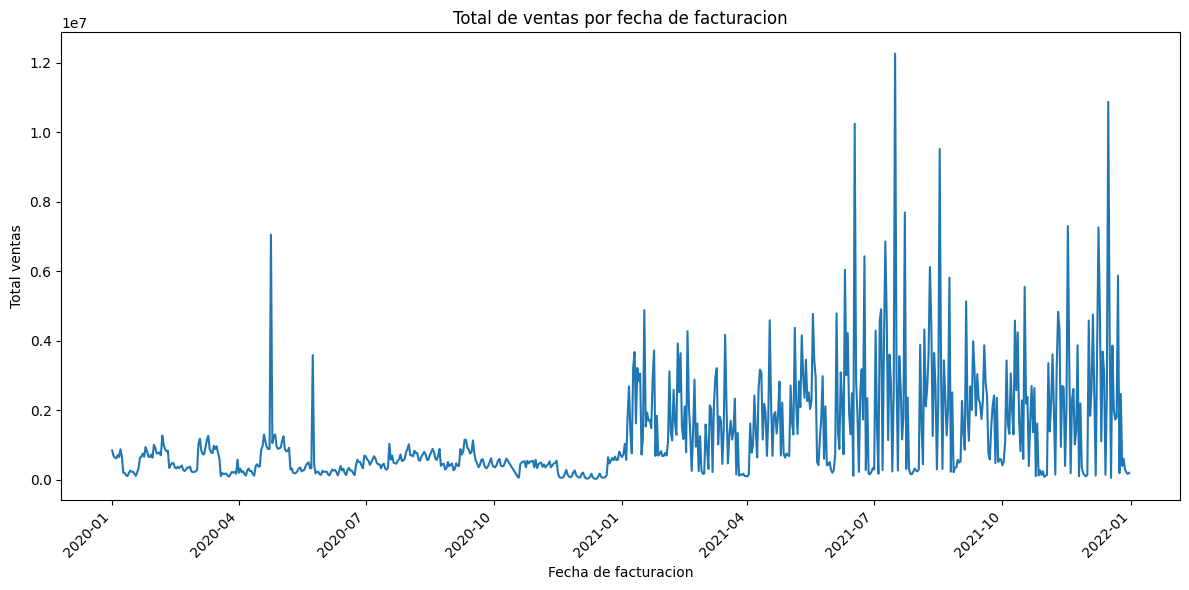

In [19]:
# Hacer un grafico de ventas por fecha de facturacion

# Convertir la columna 'Invoice Date' a tipo datetime
url['Invoice Date'] = pd.to_datetime(url['Invoice Date'])

# Agrupar por 'Invoice Date' y sumar 'Total Sales'
total_sales_por_fecha = url.groupby('Invoice Date')['Total Sales'].sum()

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(total_sales_por_fecha.index, total_sales_por_fecha.values)
plt.title('Total de ventas por fecha de facturacion')
plt.xlabel('Fecha de facturacion')
plt.ylabel('Total ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


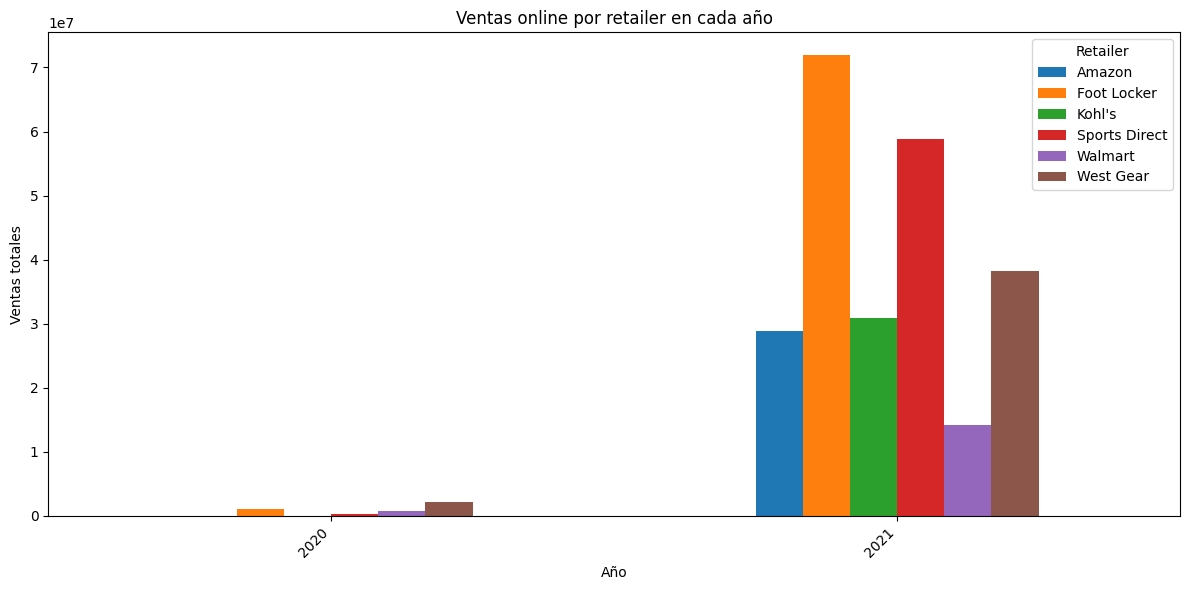

In [21]:
# Ventas online de retailer por año

# Extraer el año de la fecha de facturación
url['Year'] = url['Invoice Date'].dt.year

# Filtrar las ventas online
online_sales = url[url['Sales Method'] == 'Online']

# Agrupar por año, retailer y sumar las ventas totales
retailer_online_sales_by_year = online_sales.groupby(['Year', 'Retailer'])['Total Sales'].sum().unstack()

# Crear un gráfico para visualizar las ventas online por retailer en cada año
retailer_online_sales_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas online por retailer en cada año')
plt.xlabel('Año')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Retailer')
plt.tight_layout()
plt.show()
